# Training and Evatuation

## Loading
Loading the pickel file from the previuos preparation and transformation process.

In [ ]:
import pandas as pd
import numpy as np
import pickle
df_csv= pd.read_pickle("df_noplus/df5.pkl")

## removing subjects
The number of enrolments of each subject are vary. In some cases, there is a small number of enrolments on a particular subject, which causes high uncertainty. Therefore, the subjects that appears less than 20 times are removed from the training process.

In [12]:
all_subjects=df_csv['COURSEID'].value_counts()
##removing any subject enrolled less than 20 times
m20=all_subjects[all_subjects[:]>=20]
print df_csv.shape
df_csv=df_csv[df_csv["COURSEID"].isin(m20.index)]
print df_csv.shape

(27994, 199)
(27994, 199)


## Permutation
In many cases, the data from relational database are sorted by updated time. The sorted data will cause low accuracy when working with the classifier and k-folds cross validation. The records the to be scrambled before  the training. Note that in the preliminary test we select CS213 as a testing data.

In [4]:
df=df_csv[df_csv['COURSEID']=='CS213']
#df["COURSEID"].value_counts()
#df=pd.read_csv('../df_m20/df_CS213.csv',index_col=0)
df=df.iloc[np.random.permutation(len(df))]

## Converting to numeric data
Most of classifiers requires the traning data to be numeric. Make sure we got the right one.

In [20]:
x_head=df.columns[4:]
y_head=['GRADE']
x=df.as_matrix(x_head)
y=df.as_matrix(y_head).T[0]

print 'datatype of x is {} with shape of {}'.format(type(x), x.shape)
print 'datatype of y is {} with shape of {}'.format(type(y), y.shape)

datatype of x is <type 'numpy.ndarray'> with shape of (765L, 195L)
datatype of y is <type 'numpy.ndarray'> with shape of (765L,)


## Training and Evaluation (DIY approach)
Training and prediction are preformed in the following code. Confusion matrix, accuracy and RMS are also calculated.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

# 5 folds cross-validation
h=5 

# There are 4 partitions are used for training
clf_et.fit(x[len(y)/h:],y[len(y)/h:]) 

# And the first partition used for evaluation
dif=[];
clmax=9
cm=np.zeros((clmax,clmax))
yp=[]
ya=[]
for i in xrange(len(y)/h):
    gp=clf_et.predict(x[i,:])[0]
    ga=y[i]
    yp.append(gp)
    ya.append(ga)
    cm[gp,ga] +=1
    dif.append(ga-gp)
    #print "actual: %d, prediction: %d"%(ga,gp)
    
print "***confusion matrix"
print cm

print '***accuracy'
print np.sum(np.array([cm[i,i] for i in xrange(cm.shape[0])]))/np.sum(cm)

print '***rms'
print np.sqrt(mean_squared_error(ya, yp))

***confusion matrix
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   2.   2.   3.   0.   0.   0.]
 [  0.   0.   0.   3.   5.  12.   1.   0.   0.]
 [  0.   0.   0.   1.   4.  17.  16.   1.   0.]
 [  0.   0.   0.   0.   1.  10.  40.   5.   1.]
 [  0.   0.   0.   0.   0.   1.   6.  10.   6.]
 [  0.   0.   0.   0.   0.   0.   0.   2.   4.]]
***accuracy
0.509803921569
***rms
0.816496580928


## Distribution of differences
Here the distribution of the differences between groudtruth and prediction are illustrated. The distribution is quite broad because of the small number of enrolments, which is only 153 records.

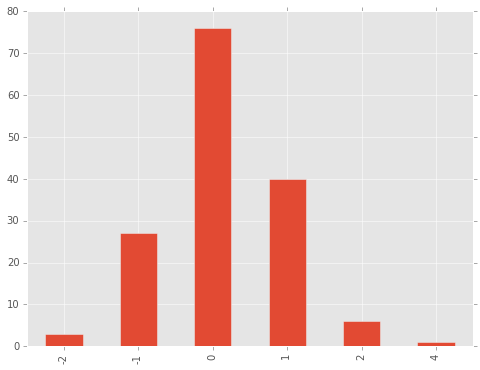

In [29]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
df_dif=pd.DataFrame({'dif':dif})
plt.rcParams['figure.figsize'] = (8,6)
df_dif.dif.value_counts().sort_index().plot(kind='bar')

In [11]:
clf_dt = DecisionTreeClassifier(max_depth=None, 
    min_samples_split=1, random_state=None, max_features=None)
scores = cross_val_score(clf_dt, x, y, cv=5)
print scores
print "--Decision Tree: %s"%scores.mean()

clf_rf=RandomForestClassifier(n_estimators=10, max_depth=None, 
    min_samples_split=1, random_state=None, max_features=None)
scores = cross_val_score(clf_rf, x, y, cv=5)
print scores
print "--Random Forest: %s"%scores.mean()

clf_et = ExtraTreesClassifier(n_estimators=10, max_depth=None, 
    min_samples_split=1, random_state=None, max_features=None)
scores = cross_val_score(clf_et, x, y, cv=5)
print scores
print "--Extra Tree: %s"%scores.mean()

clf_svm = svm.SVC()
scores = cross_val_score(clf_svm, x, y, cv=5)
print scores
print "--SVM: %s"%scores.mean()

[ 0.45806452  0.49350649  0.42763158  0.42763158  0.49342105]
--Decision Tree: 0.460051044032
[ 0.50322581  0.48701299  0.46052632  0.53947368  0.55921053]
--Random Forest: 0.509889863956
[ 0.49677419  0.49350649  0.53289474  0.50657895  0.50657895]
--Extra Tree: 0.507266663727
[ 0.49677419  0.49350649  0.46052632  0.45394737  0.51315789]
--SVM: 0.4835824532


## Larger dataset
Now it is ready to test with other subjects, which has bigger number of enrolments.

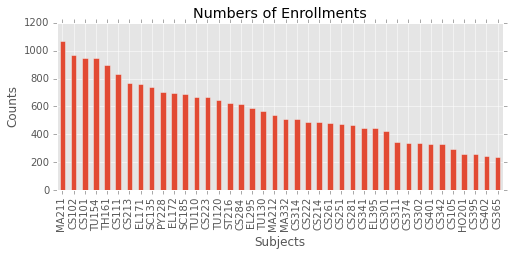

In [30]:
## real experiment starts here
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,3)
plt.title("Numbers of Enrollments")
plt.xlabel("Subjects")
plt.ylabel("Counts")
m20.head(40).plot(kind='bar')

## Root Mean Square Error
The following code calculate the RMSE of all subjects in the list m20.

 MA211  CS102  CS101  TU154  TH161  CS111  CS213  EL171  SC135  PY228  EL172  SC185  TU110  CS223  TU120  ST216  CS284  EL295  TU130  MA212  MA332  CS314  CS222  CS214  CS261  CS251  CS281  CS341  EL395  CS301  CS311  CS374  CS302  CS401  CS342  CS105  HO201  CS395  CS402  CS365  EL070  AT326  TU100  CS289  CS385  AT316  CS326  TU122  CS288  CS487  CS211  CS489  SC123  SC173  CS296  CS488  SW111  CS367  SW365  CS486  SW212  CS409  SW221  CS215  CS386  CS366  CS295  LA209  CS377  CS456  CS467  SW478  CS300  SW213  BA291  MW314  SW475  ES356  CS427  CS396  CS387  CS297  CS286  CS429  SW335  CS446  CS356  HR201  CS459  NS132  SO201  TA395  CJ321  CS397  CS398  CS348  CJ317  MW313  CJ316  CS407  MA216  CS115  CS457  CS388  CS449  CS426  CS408  CJ315  CS399  CS285 

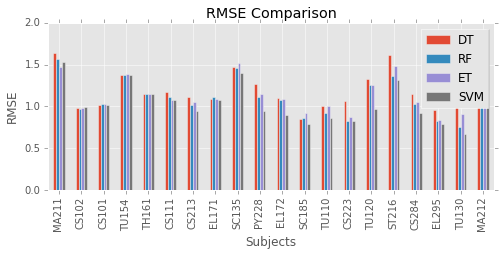

In [32]:
from sklearn.metrics import mean_squared_error

df_rms = pd.DataFrame(m20.copy(), columns=['DT'])
df_rms['RF'] = m20.copy()
df_rms['ET'] = m20.copy()
df_rms['SVM'] = m20.copy()

for subject,count in m20.iteritems():
    print "%s "%subject,
    ##load data
    dfx=df_csv[df_csv['COURSEID']==subject]
    dfx=dfx.iloc[np.random.permutation(len(dfx))]
    
    ##convert to np.array
    x=dfx.as_matrix( dfx.columns[4:] )
    y=dfx.as_matrix( ['GRADE'] ).T[0]
    
    #1st partition for training  
    x1=x[len(y)/5:]   
    y1=y[len(y)/5:]
    
    #2nd partition for testing
    x2=x[:len(y)/5] 
    y2=y[:len(y)/5]
    
    ##evaluate rms
    clf_dt.fit(x1,y1)
    df_rms['DT'].loc[subject]= np.sqrt(mean_squared_error( y2, clf_dt.predict(x2) ))
    
    clf_rf.fit(x1,y1)
    df_rms['RF'].loc[subject]= np.sqrt(mean_squared_error( y2, clf_rf.predict(x2) ))
    
    clf_et.fit(x1,y1)
    df_rms['ET'].loc[subject]= np.sqrt(mean_squared_error( y2, clf_et.predict(x2) ))
    
    clf_svm.fit(x1,y1)
    df_rms['SVM'].loc[subject]= np.sqrt(mean_squared_error( y2, clf_svm.predict(x2) ))

df_rms.head(20).plot(kind='bar')
plt.rcParams['figure.figsize'] = (8,5)
plt.title("RMSE Comparison")
plt.xlabel("Subjects")
plt.ylabel("RMSE")

## Accuracy
The following code calculate the accuracy of all subjects in the list m20.Note that this is a long process, it is better to enjoy a cup tea during the calculation.

 MA211  CS102  CS101  TU154  TH161  CS111  CS213  EL171  SC135  PY228  EL172  SC185  TU110  CS223  TU120  ST216  CS284  EL295  TU130  MA212  MA332  CS314  CS222  CS214  CS261  CS251  CS281  CS341  EL395  CS301  CS311  CS374  CS302  CS401  CS342  CS105  HO201  CS395  CS402  CS365  EL070  AT326  TU100  CS289  CS385  AT316  CS326  TU122  CS288  CS487  CS211  CS489  SC123  SC173  CS296  CS488  SW111  CS367  SW365  CS486  SW212  CS409  SW221  CS215  CS386  CS366  CS295  LA209  CS377  CS456  CS467  SW478  CS300  SW213  BA291  MW314  SW475  ES356  CS427  CS396  CS387  CS297  CS286  CS429  SW335  CS446  CS356  HR201  CS459  NS132  SO201  TA395  CJ321  CS397  CS398  CS348  CJ317  MW313  CJ316  CS407  MA216  CS115  CS457  CS388  CS449  CS426  CS408  CJ315  CS399  CS285 

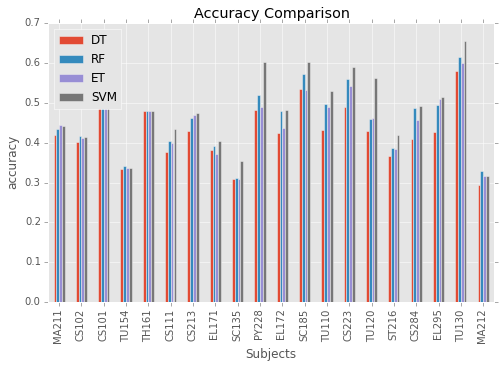

In [35]:
df_accuracy = pd.DataFrame(m20.copy(), columns=['DT'])
df_accuracy['RF'] = m20.copy()
df_accuracy['ET'] = m20.copy()
df_accuracy['SVM'] = m20.copy()

for subject,count in m20.iteritems():
    print "%s "%subject,
    ##load data
    dfx=df_csv[df_csv['COURSEID']==subject]
    dfx=dfx.iloc[np.random.permutation(len(dfx))]
    ##convert to np.array
    x=dfx.as_matrix( dfx.columns[4:] )
    y=dfx.as_matrix( ['GRADE'] ).T[0]
    ##evaluation accuracy
    df_accuracy['DT'].loc[subject]=cross_val_score(clf_dt, x, y, cv=5).mean()
    df_accuracy['RF'].loc[subject]=cross_val_score(clf_rf, x, y, cv=5).mean()
    df_accuracy['ET'].loc[subject]=cross_val_score(clf_et, x, y, cv=5).mean()
    df_accuracy['SVM'].loc[subject]=cross_val_score(clf_svm, x, y, cv=5).mean()

df_accuracy.head(20).plot(kind='bar')
plt.rcParams['figure.figsize'] = (8,5)
plt.title("Accuracy Comparison")
plt.xlabel("Subjects")
plt.ylabel("accuracy")